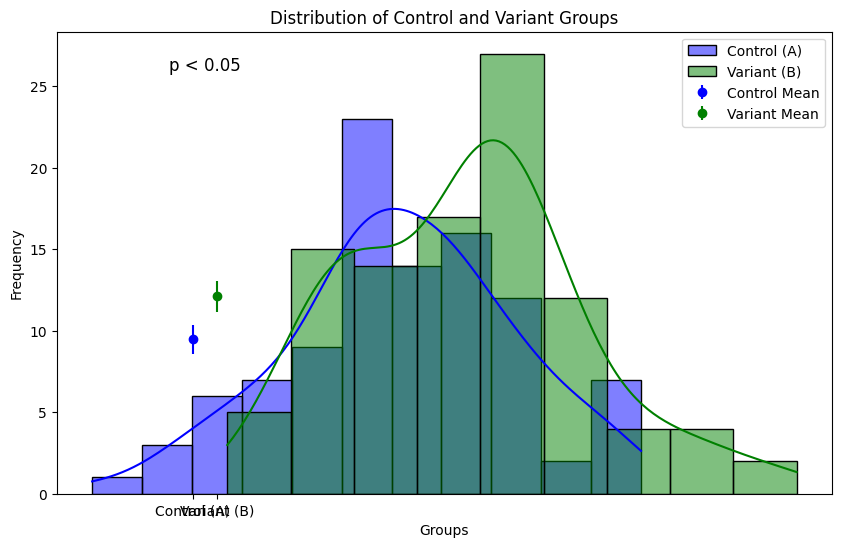


Basic Statistics:
Control Group Mean: 9.48, Std Dev: 4.54
Variant Group Mean: 12.11, Std Dev: 4.77

Hypothesis Testing:
T-statistic: -3.9953, P-value: 0.0001

Conclusion: Reject null hypothesis. There is a significant difference between groups A and B.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42) 
control_group = np.random.normal(loc=10, scale=5, size=100) 
variant_group = np.random.normal(loc=12, scale=5, size=100)  

mean_control = np.mean(control_group)
mean_variant = np.mean(variant_group)
std_dev_control = np.std(control_group, ddof=1)  
std_dev_variant = np.std(variant_group, ddof=1)  

t_stat, p_value = stats.ttest_ind(control_group, variant_group, equal_var=False)

plt.figure(figsize=(10, 6))
sns.histplot(control_group, kde=True, color='blue', label='Control (A)', alpha=0.5)
sns.histplot(variant_group, kde=True, color='green', label='Variant (B)', alpha=0.5)
plt.errorbar([1], mean_control, yerr=1.96 * std_dev_control / np.sqrt(len(control_group)), fmt='o', color='blue', label='Control Mean')
plt.errorbar([2], mean_variant, yerr=1.96 * std_dev_variant / np.sqrt(len(variant_group)), fmt='o', color='green', label='Variant Mean')


if p_value < 0.05:
    plt.text(1.5, max(np.histogram(control_group, bins=10)[0]) + 5, 'p < 0.05', fontsize=12, ha='center')


plt.xticks([1, 2], ['Control (A)', 'Variant (B)'])
plt.xlabel('Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Control and Variant Groups')


plt.legend()


plt.show()


print("\nBasic Statistics:")
print(f"Control Group Mean: {mean_control:.2f}, Std Dev: {std_dev_control:.2f}")
print(f"Variant Group Mean: {mean_variant:.2f}, Std Dev: {std_dev_variant:.2f}")


print("\nHypothesis Testing:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject null hypothesis. There is a significant difference between groups A and B.")
else:
    print("\nConclusion: Fail to reject null hypothesis. There is no significant difference between groups A and B.")
